<a href="https://colab.research.google.com/github/Ramardu/alura_store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
from matplotlib import pyplot as plt

tienda['Tienda'] = 'A'
tienda2['Tienda'] = 'B'
tienda3['Tienda'] = 'C'
tienda4['Tienda'] = 'D'

# 1. Análisis de facturación



## **Código**

In [ ]:
# Crear diccionario con facturación por tienda
an_fact = {
    f'Tienda {t["Tienda"].iloc[0]}': [f'${sum(t["Precio"]):,.0f}']
    for t in [tienda, tienda2, tienda3, tienda4]
}

# Convertir a DataFrame
df_an_fact = pd.DataFrame.from_dict(an_fact, orient="index", columns=["Facturación"])


# Mostrar resultado
print(df_an_fact)

             Facturación
Tienda A  $1,150,880,400
Tienda B  $1,116,343,500
Tienda C  $1,098,019,600
Tienda D  $1,038,375,700


## Análisis

La tabla de datos presenta de manera detallada los ingresos totales generados por ventas en cada una de las tiendas de la cadena Alura Store, desde la tienda A hasta la tienda D.

Al comparar los ingresos, observamos que la tienda A obtuvo el mayor ingreso, mientras que la tienda D registró el menor. La diferencia entre ambas es de \$112.504.700. Por otro lado, al comparar la tienda C \(penúltima en ingresos\) con la tienda D, la diferencia es de $59.643.900.

Estas diferencias son significativas: en el primer caso, la brecha representa aproximadamente un 10\% de los ingresos totales de la tienda A; en el segundo caso, cerca del 6\% de los ingresos de la tienda C.

Aunque a simple vista los ingresos totales entre tiendas puedan parecer similares, las diferencias evidenciadas son relevantes y pueden influir considerablemente en la rentabilidad y estrategias comerciales de la organización.




# 2. Ventas por categoría

## **Código**

In [ ]:
# Crear diccionario con el total de unidades vendidas de cada categoría por tienda
vtas_cat ={f'Tienda {t["Tienda"].iloc[0]}':t.groupby("Categoría del Producto")["Precio"].count()
           for t in [tienda, tienda2, tienda3, tienda4]}

# Convertir a DataFrame
df_vtas_cat = pd.DataFrame(vtas_cat)

# Mostrar resultado
print(df_vtas_cat)

                         Tienda A  Tienda B  Tienda C  Tienda D
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


## **Análisis**

Los datos revelan información relevante sobre el total de ventas por categoría en cada tienda, desde la A hasta la D.

En cuanto al volumen total de productos vendidos, las tiendas A, B y C registran una cantidad idéntica: 2.359 unidades cada una. La tienda D presenta una mínima diferencia, con 2.358 productos vendidos.

Al analizar el desempeño por categoría, se observa lo siguiente:

*   Artículos para el hogar: Tienda D lidera con 201 ventas.
*   Deportes y diversión: Tienda A alcanza el mayor número con 284 ventas.
*   Electrodomésticos: Tienda A también destaca con 312 ventas.
*   Electrónicos: Las tiendas C y D comparten el primer lugar, con 451 ventas cada una.
*   Instrumentos musicales: Tienda B se posiciona como líder con 224 ventas.
*   Juguetes: Tienda D encabeza con 338 ventas.
*   Libros: Tienda B registra el mayor número con 197 ventas.
*   Muebles: Tienda C sobresale con 499 ventas.

En conclusión, la tienda D muestra una tendencia destacada al posicionarse como líder en la mayor cantidad de categorías, lo que sugiere un mejor desempeño general en diversidad de productos.

# 3. Calificación promedio de la tienda


## **Código**

In [ ]:
# Crear diccionario con la calificación promedio por tienda
calif_avg = {f'Tienda {t["Tienda"].iloc[0]}': round(t["Calificación"].mean(),2)
             for t in [tienda, tienda2, tienda3, tienda4]}

# Convertir a DataFrame
df_calif_avg = pd.DataFrame.from_dict(calif_avg, orient="index", columns=["Calificación promedio"])

# Mostrar resultado
print(df_calif_avg)

          Calificación promedio
Tienda A                   3.98
Tienda B                   4.04
Tienda C                   4.05
Tienda D                   4.00


## **Análisis**

# 4. Productos más y menos vendidos

## **Código**

In [ ]:
# Crear diccionario con los productos más y menos vendidos
vtas_prod = {f'Tienda {t["Tienda"].iloc[0]}': [
    t.groupby("Producto")["Precio"].count().idxmax(),
    t.groupby("Producto")["Precio"].count().idxmin()
] for t in [tienda, tienda2, tienda3, tienda4]}

# Convertir a DataFrame
df_vtas_prod = pd.DataFrame.from_dict(vtas_prod, orient="columns")
df_vtas_prod.index = ["Producto más vendido", "Producto menos vendido"]

#Mostrar resultado
print(df_vtas_prod)

                                         Tienda A                   Tienda B  \
Producto más vendido                      Armario  Iniciando en programación   
Producto menos vendido  Auriculares con micrófono              Juego de mesa   

                                       Tienda C            Tienda D  
Producto más vendido              Kit de bancas            Cama box  
Producto menos vendido  Bloques de construcción  Guitarra eléctrica  


## **Análisis**

# 5. Envío promedio por tienda

## **Código**

In [ ]:
# Crear diccionario con el valor del envío promedio por tienda
gto_avg_e = {f'Tienda {t["Tienda"].iloc[0]}':[f'${t["Costo de envío"].mean():,.0f}']
             for t in [tienda, tienda2, tienda3, tienda4]}

# Convertir a DataFrame
df_gto_avg_e = pd.DataFrame.from_dict(gto_avg_e, orient="index", columns=["Envío promedio por tienda"])

# Mostrar resultado
print(df_gto_avg_e)


         Envío promedio por tienda
Tienda A                   $26,019
Tienda B                   $25,216
Tienda C                   $24,806
Tienda D                   $23,459


## **Análisis**

# **Relatoría**







## **Introducción**
El señor Juan nos contrato para ayudarlo en la toma de una decisión, requiriendo un soporte a la respuesta de la pregunta "¿Cuál tienda de su cadena Alura Store debería vender?". Nos presentó la información de cuatro tiendas de su cadena Alura Store. De acuerdo a los resultados que hallemos del análisis de la información, el señor Juan desería vender la menos rentable con el fin de comenzar un nuevo negocio.

## **Contenido**

*   Compendio de los análisis realizados anteriormente a razón de:
  * Análisis de Facturación.
  * Ventas por categoría.
  * Calificación promedio de la tienda.
  * Productos más y menos vendidos.
  * Envío promedio por tienda.
*   Gráficos basados en la información de:
  * Análisis de Facturación - Gráfico de pastel.
  * Ventas por categoría - Gráfico de barras.
  * Calificación promedio de la tienda - Gráfico de barras horizontales.
*   Análisis general del compendio y gráficos.
*   Sugerencia de venta basada en la información analisada y hallada.

### *****Compendio de los análisis realizados*****



### *****Gráficos*****

#### **Análisis de Facturación - Gráfico de pastel**

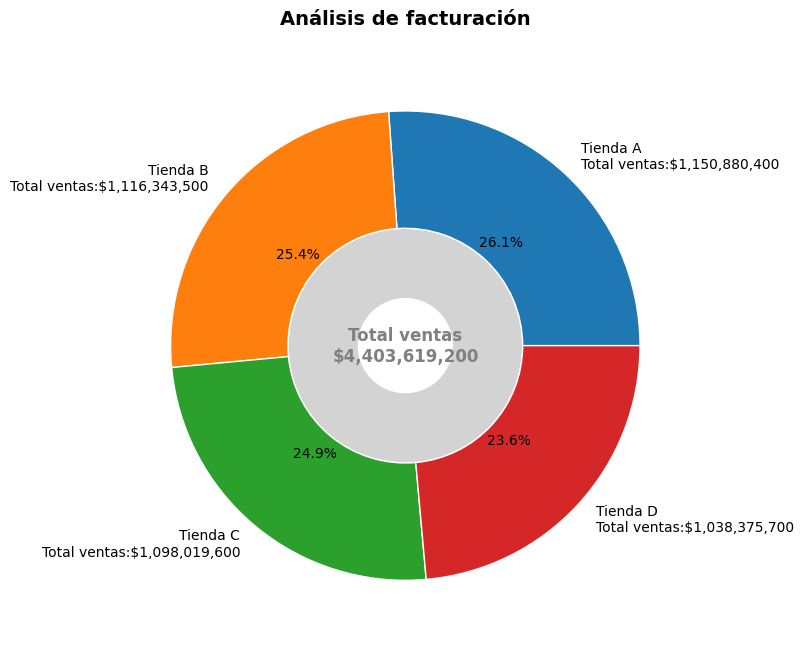

In [ ]:
# Concatenar todas las tiendas en un solo DataFrame
datos_global = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar facturación por tienda
fact_global = datos_global.groupby('Tienda')['Precio'].sum()
total_tiendas = fact_global.sum()

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8,8))

# Anillo interior — Total en gris
ax.pie([total_tiendas],
       labels=[""],
       radius=0.5,
       colors=['lightgray'],
       wedgeprops=dict(width=0.3, edgecolor='white'))

# Anillo exterior — Distribución por tienda
wedges, texts, autotexts = ax.pie(
    fact_global.values,
    labels=[f'Tienda {tienda}\nTotal ventas:${valor:,.0f}' for tienda, valor in zip(fact_global.index, fact_global.values)],
    radius=1.0,
    wedgeprops=dict(width=0.5, edgecolor='white'),
    autopct='%1.1f%%',
    textprops={'fontsize': 10}
)

# Texto en el centro indicando el total
ax.text(0, 0, f'Total ventas\n${total_tiendas:,.0f}',
        ha='center', va='center', fontsize=12, fontweight='bold', color='gray')

# Título explicativo
plt.title(f'Análisis de facturación',
          fontsize=14, pad=20, fontweight='bold')

# Ajuste automático y mostrar gráfica
plt.tight_layout()
plt.show()

#### **Ventas por categoría - Gráfico de barras**

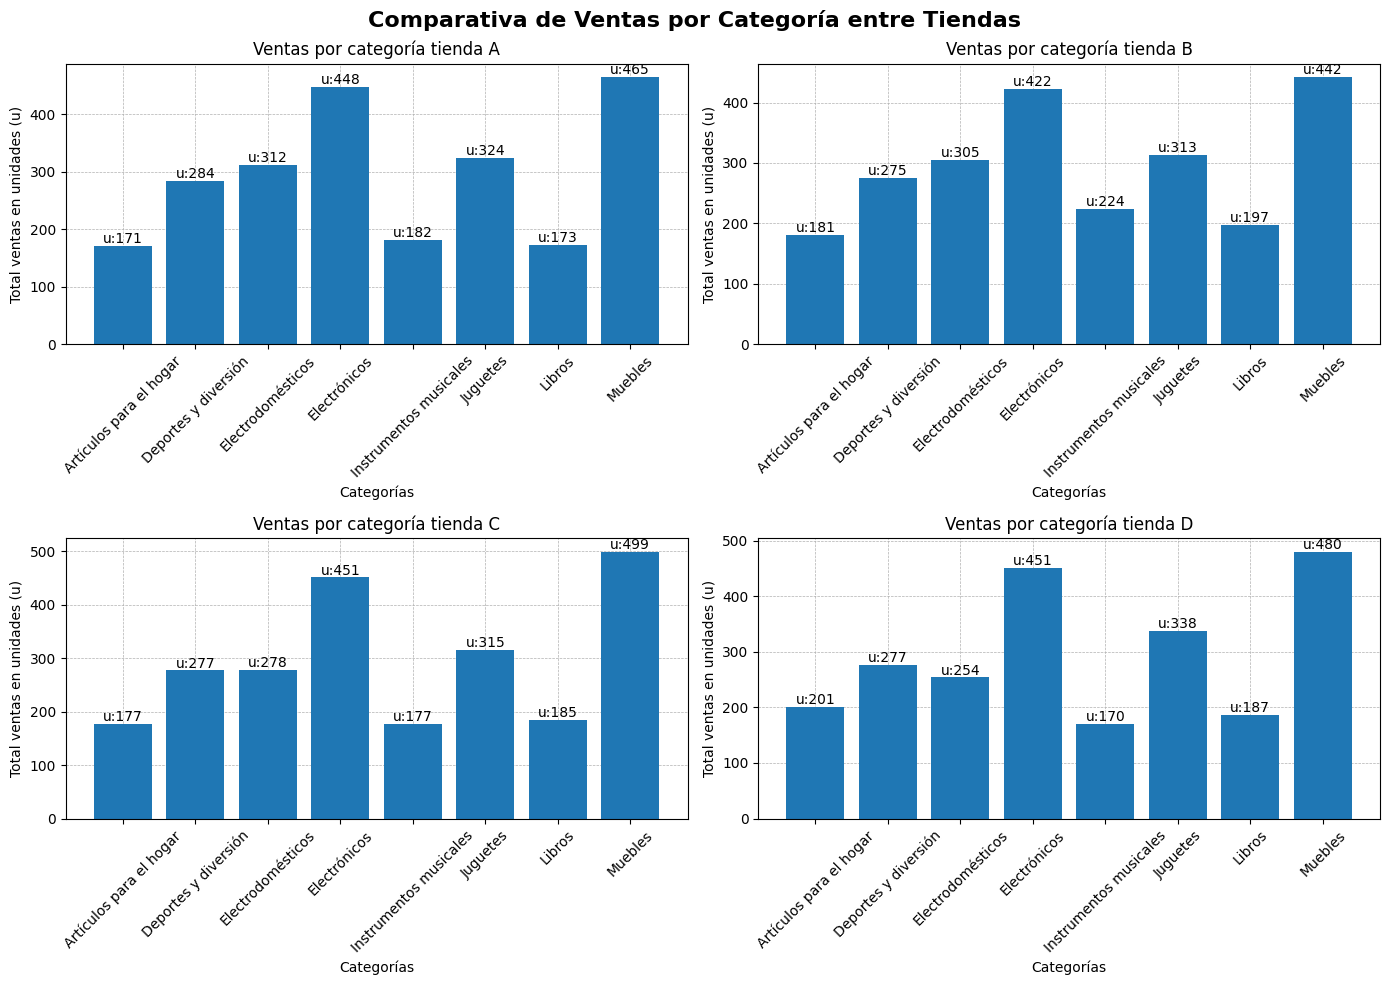

In [ ]:
# Agrupar datos
datos1 = tienda.groupby('Categoría del Producto')['Precio'].count()
datos2 = tienda2.groupby('Categoría del Producto')['Precio'].count()
datos3 = tienda3.groupby('Categoría del Producto')['Precio'].count()
datos4 = tienda4.groupby('Categoría del Producto')['Precio'].count()

# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# Título general
fig.suptitle('Comparativa de Ventas por Categoría entre Tiendas', fontsize=16, fontweight='bold')

# Lista para recorrer datos y títulos
datos_list = [datos1, datos2, datos3, datos4]
titulos = ['Ventas por categoría tienda A', 'Ventas por categoría tienda B',
           'Ventas por categoría tienda C', 'Ventas por categoría tienda D']

# Generar cada gráfica
for i, ax in enumerate(axs.flat):
    datos = datos_list[i]
    ax.bar(datos.index, datos.values)

    ax.set_xticks(range(len(datos.index)))
    ax.set_xticklabels(datos.index, rotation=45)

    ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.set_title(titulos[i])
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Total ventas en unidades (u)')

    # Agregar etiquetas encima de las barras
    for j, valor in enumerate(datos):
        texto = f'u:{valor}'
        ax.text(j, valor + 5, texto, ha='center')

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()


#### **Calificación promedio de la tienda - Gráfico de barras horizontales**

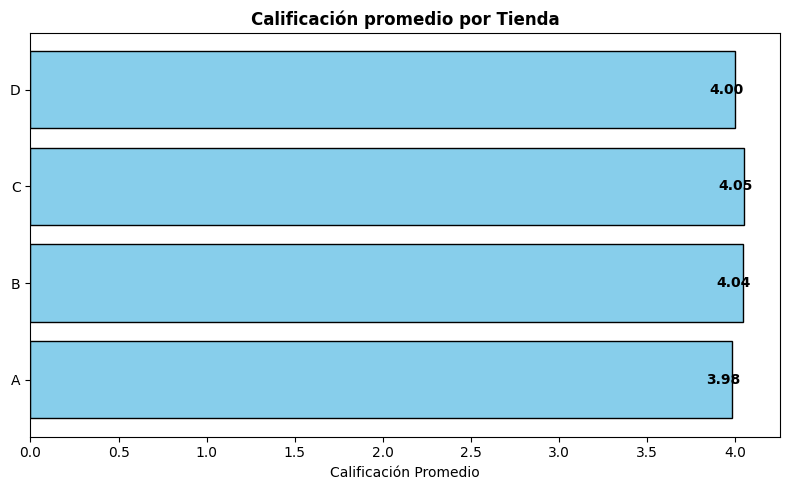

In [ ]:
# Agrupar calificaciones
cal_tienda = tienda.groupby('Tienda')['Calificación'].agg(['sum', 'count'])
cal_tienda2 = tienda2.groupby('Tienda')['Calificación'].agg(['sum', 'count'])
cal_tienda3 = tienda3.groupby('Tienda')['Calificación'].agg(['sum', 'count'])
cal_tienda4 = tienda4.groupby('Tienda')['Calificación'].agg(['sum', 'count'])

# Lista de DataFrames
cal_tiendas = [cal_tienda, cal_tienda2, cal_tienda3, cal_tienda4]

# Almacenar nombres y promedios
nombres_tiendas = []
promedios = []

# Recorrer cada DataFrame
for tabla in cal_tiendas:
    for tienda in tabla.index:
        promedio = round(tabla.loc[tienda, 'sum'] / tabla.loc[tienda, 'count'], 2)
        nombres_tiendas.append(tienda)
        promedios.append(promedio)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8,5))

# Gráfica de barras horizontal
bars = ax.barh(nombres_tiendas, promedios, color='skyblue', edgecolor='black')

# Etiquetas y título
ax.set_xlabel('Calificación Promedio')
ax.set_title('Calificación promedio por Tienda', fontweight='bold')

# Agregar el promedio dentro de cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width - 0.05, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}',
            va='center', ha='center', color='black', fontweight='bold')

# Mostrar gráfico
plt.tight_layout()
plt.show()

### *****Análisis general del compendio y gráficos*****

### *****Sugerencia de venta basada en la información analisada y hallada*****